# Figure 2: Extracted spectra

## Notebook setup

All data used by this notebook is located in the Google Drive directory [here](https://drive.google.com/drive/folders/1CZvW3CWhJx8LIvyyTOQsPzeBMtjlXX_Y?usp=sharing). The notebook assumes that the top level directory `data` is located in the same path. For maintainability, it also makes use of a local Python file [`utils.py`](https://github.com/icweaver/HATP23b/blob/main/utils.py) containing different utility functions, denoted by `utils.<function>`. If using `conda`, this environment can be reproduced with:

```shell
conda env create -f "$1"; conda activate "$2"
```

Similar notebooks producing the other figures in the paper can be found [here](https://icweaver.github.io/HAT-P-23b/).

In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
import glob as glob
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

import bz2
import corner
import json
import pathlib
import pickle
import utils
import warnings

from astropy import constants as const
from astropy import units as uni
from astropy.io import ascii, fits
from astropy.time import Time
from mpl_toolkits.axes_grid1 import ImageGrid

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = {
    # xticks
    "xtick.top": False,
    "xtick.direction": "out",
    "xtick.major.size": 5,
    "xtick.minor.visible": False,
    # yticks
    "ytick.right": False,
    "ytick.direction": "out",
    "ytick.major.size": 5,
    "ytick.minor.visible": False,
    # pallete
    "axes.prop_cycle": mpl.cycler(
        color=[
            "#fdbf6f",  # Yellow
            "#ff7f00",  # Orange
            "#a6cee3",  # Cyan
            "#1f78b4",  # Blue
            "#956cb4",  # Purple
            "#029e73",  # Green
            "#c44e52",  # Red
        ]
    ),
}
plt.rcParams.update(params)

<IPython.core.display.Javascript object>

## [Dowload data](https://www.dropbox.com/sh/1wos8mobpc8avlo/AAC2O8V52acy9ES2q2WDtmEOa?dl=1)

This should be placed in a folder named `data` in the same level as this notebook

## Plot

In [3]:
# Load
data_dir = "data/02"

wavs_d, wavs_u = np.genfromtxt(f"{data_dir}/hp23_bins.dat", unpack=True)

fpaths = sorted(glob.glob(f"{data_dir}/ut*/LC*.pbz2"))
data_dict = {
    f"Transit {i}": utils.decompress_pickle(fpath)
    for (i, fpath) in enumerate(fpaths, start=1)
}

<IPython.core.display.Javascript object>

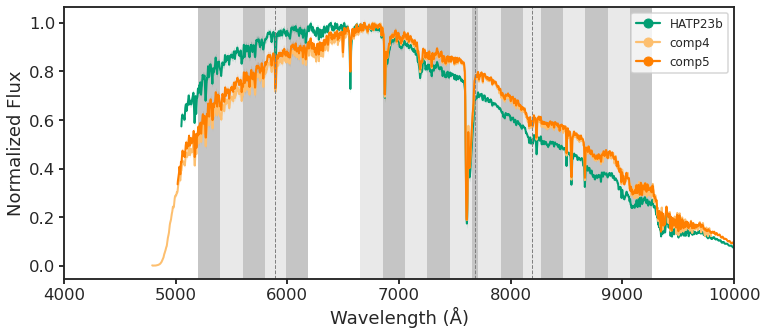

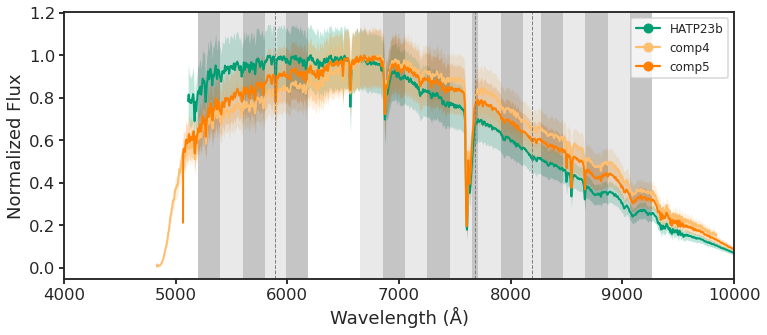

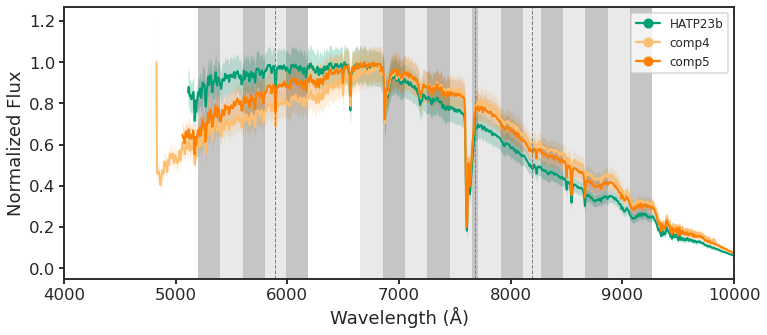

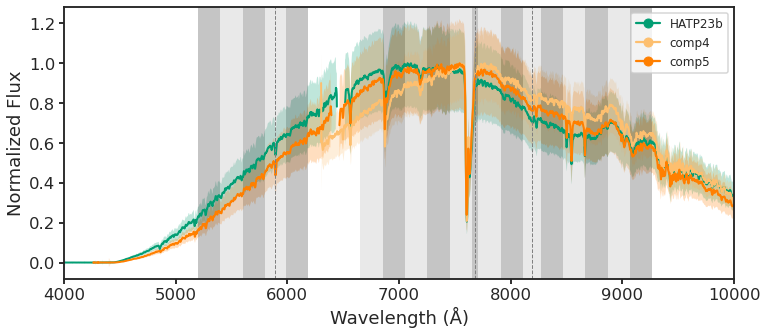

<IPython.core.display.Javascript object>

In [4]:
# Plot
object_names = ["HATP23b", "comp4", "comp5"]
for transit, data in data_dict.items():
    spec = data["spectra"]
    wavs = spec["wavelengths"]

    fig, ax = plt.subplots(figsize=FIG_WIDE)
    c = "darkgrey"
    for name, data in sorted(spec.items()):
        if name in "HATP23b":
            median_kwargs = {"c": "C5"}
        else:
            median_kwargs = None
            c = "grey"
        if name in object_names:
            p, wav, flux = utils.plot_spec_file(
                ax,
                data=data,
                wavs=wavs,
                label=name,
                median_kwargs=median_kwargs,
            )
    ax.legend(loc=1, fontsize=12)

    # Bins
    for i, (w_d, w_u) in enumerate(zip(wavs_d, wavs_u)):
        c = "k" if i % 2 == 0 else "darkgrey"
        ax.axvspan(w_d, w_u, alpha=0.25, color=c, lw=0)

    # Species
    species = {"Na I-D": 5892.9, "K I_avg": 7682.0, "Na I-8200_avg": 8189.0}
    [ax.axvline(wav, ls="--", lw=1, color="grey") for name, wav in species.items()]

    title = transit
    ax.set_xlabel("Wavelength (Å)")
    ax.set_ylabel("Normalized Flux")
    # ax.set_title(title)
    ax.set_xlim(4_000, 10_000)

    # Save
    title = title.lower().replace(" ", "_") + "_extr_spec"
    fig.tight_layout()
    fig.set_size_inches(FIG_WIDE)

    utils.savefig(f"../paper/figures/extracted_spectra/{title}.pdf")

[Other notebooks](https://icweaver.github.io/HAT-P-23b/)